In [ ]:
import cv2
import matplotlib.pyplot as plt

from skimage.io import imread
from matplotlib.pyplot import imshow, show, subplot
from skimage.color import  rgb2lab
from google.colab.patches import cv2_imshow
import numpy as np

# **Read image in BGR**


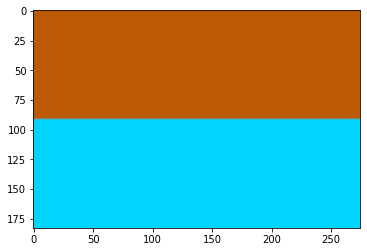

In [ ]:
img=cv2.imread('/content/images.png')
plt.imshow(img)
plt.show()

# Convert it from BGR TO RGB 

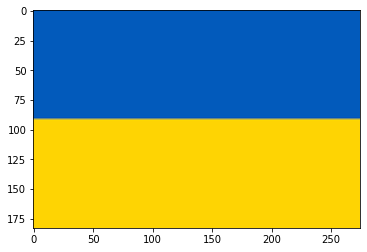

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


# Transfer RGB to LAB 

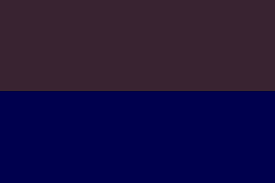

In [ ]:
img_lab = rgb2lab(img)
cv2_imshow(img_lab)




## Separate 3 Chanels 

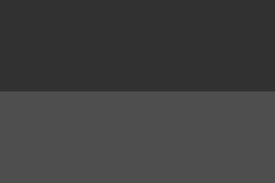

In [ ]:

L,A,B=cv2.split(img_lab)
cv2_imshow(L) #L chanel

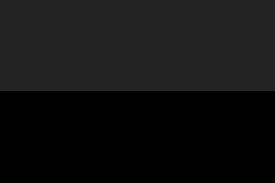

In [ ]:
cv2_imshow(A) # A chanel

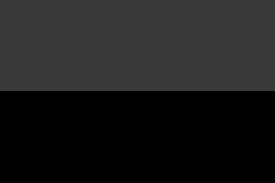

In [ ]:
cv2_imshow(B) # B chanel 


In [ ]:
B

array([[ 57.90463581,  57.90463581,  57.90463581, ...,  57.90463581,
         57.90463581,  57.90463581],
       [ 57.90463581,  57.90463581,  57.90463581, ...,  57.90463581,
         57.90463581,  57.90463581],
       [ 57.90463581,  57.90463581,  57.90463581, ...,  57.90463581,
         57.90463581,  57.90463581],
       ...,
       [-32.58806294, -32.58806294, -32.58806294, ..., -32.58806294,
        -32.58806294, -32.58806294],
       [-32.58806294, -32.58806294, -32.58806294, ..., -32.58806294,
        -32.58806294, -32.58806294],
       [-32.58806294, -32.58806294, -32.58806294, ..., -32.58806294,
        -32.58806294, -32.58806294]])

In [ ]:
print(B.shape)


(183, 275)


# Sperarate Both Colors by new edge 

In [ ]:
yellow=np.zeros(B.shape)
blue=np.zeros(B.shape)
for i in range(len(B)):
  for j in range(len(B[0])):
    if B[i][j]>0:
      yellow[i][j]=B[i][j]
    else:
      blue[i][j]=B[i][j]
blue


array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-32.58806294, -32.58806294, -32.58806294, ..., -32.58806294,
        -32.58806294, -32.58806294],
       [-32.58806294, -32.58806294, -32.58806294, ..., -32.58806294,
        -32.58806294, -32.58806294],
       [-32.58806294, -32.58806294, -32.58806294, ..., -32.58806294,
        -32.58806294, -32.58806294]])

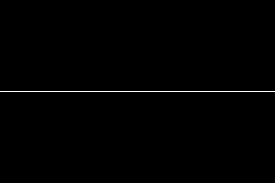

In [ ]:
detected = cv2.Canny(img,100,200)
cv2_imshow(detected) 



# **Merging the detection with the image**



In [ ]:
# second way 
def second_way(img):
  max_rows_index=detected.argmax(axis=0) 
  type(max_rows_index)
  # detected=np.array(detected) 
  # print(np.where(detected==255)) 
  for i in range (img.shape[1]):
    img[max_rows_index[0]][i] = 255 
  cv2_imshow(img)

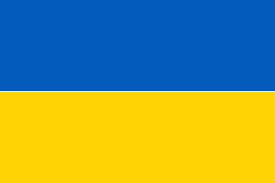

In [ ]:
second_way(img)

In [ ]:
def first_way(img):
  for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        if detected[i][j] == 255:
          img[i][j] = 255
    
  cv2_imshow(img)

 

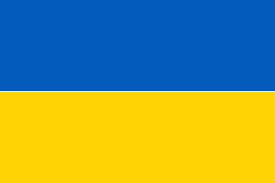

In [ ]:
first_way(img)

In [ ]:
from skimage import measure

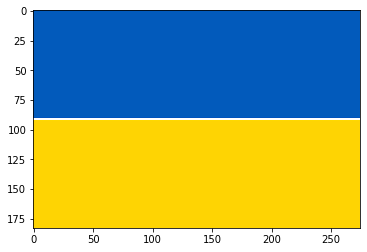

In [ ]:
def Second_Way(yellow,img_rgb):
  contours=measure.find_contours(yellow,.8)
  fig, ax = plt.subplots()
  ax.imshow(img_rgb, cmap=plt.cm.gray)

  for contour in contours:
      ax.plot(contour[:, 1], contour[:, 0], linewidth=2,color='white')

  
Second_Way(yellow,img_rgb)